# Modelling

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_row',50)

In [2]:
DATA_DIR = '../data'

In [3]:
data = pd.read_csv("{}/processed/dataset.csv".format(DATA_DIR))

In [4]:
LABEL = 'roi'

In [5]:
train = data[~pd.isnull(data["points"])]
train["roi"] = train["roi"].fillna(0)
test = data[pd.isnull(data["points"])]

<ipython-input-5-97c2e041d959>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["roi"] = train["roi"].fillna(0)


In [6]:
train.shape

(7083, 104)

In [7]:
test.shape

(626, 104)

In [8]:
train.head()

,player,date,league_name,team_name,opponent_name,fantasy_points,min,position,year,month,day,points,value,skill,last_md_points,last_md_goals,last_md_assists,prev_mean_points,prev_mean_goals,prev_mean_assists,prev_max_points,prev_std_points,prev_std_goals,prev_std_assists,prev_median_min,prev_ratio_starter,count_played,goal_consistency,assist_consistency,clean_sheet_consistency,count_team_played,prev_ratio_played,prev_team_highest_rank,team_rank,team_total_points,prev_opponent_highest_rank,opponent_rank,opponent_total_points,team_mean_squad_age,team_market_value,team_mean_market_value,opponent_mean_squad_age,opponent_market_value,opponent_mean_market_value,age,height_cm,weight_kg,league_rank,overall,potential,wage_eur,international_reputation,pace,shooting,passing,dribbling,defending,nation_position,nation_jersey_number,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,diff_team_points,diff_team_ranking,diff_team_market_value,diff_team_mean_market_value,diff_team_mean_squad_age,is_senior,is_imbalanced,gap_to_potential,roi,attacking_work_rate,defending_work_rate
0,Aaron Ramsey,2018-09-06 00:00:00,UEFA Nations League,Wales,Republic of Ireland,21.00,90.0,M,2018,9,6,7.0,8.5,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,19,1536,26,29,1484,25.6,1.767500e+09,68000000.0,25.5,7.765000e+08,29900000.0,26.0,183.0,76.0,1.0,82.0,83.0,130000.0,3.0,68.0,75.0,79.0,81.0,65.0,RF,10.0,75.0,75.0,72.0,58.0,84.0,79.0,81.0,70.0,70.0,80.0,82.0,67.0,68.0,76.0,81.0,75.0,81.0,67.0,89.0,69.0,74.0,73.0,69.0,82.0,80.0,75.0,81.0,70.0,67.0,6.0,11.0,5.0,10.0,8.0,52,-10,9.910000e+08,38100000.0,0.1,True,False,1.0,0.823529,High,High
1,Aaron Ramsey,2018-09-09 00:00:00,UEFA Nations League,Wales,Denmark,13.50,90.0,M,2018,9,9,2.0,8.5,3.0,7.0,1.0,0.0,7.000000,1.0,0.0,7.0,NaN,NaN,NaN,90.0,1.0,1.0,1.000000,0.0,0.0,1.0,1.00,18,19,1536,9,9,1580,25.6,1.767500e+09,68000000.0,27.8,3.107000e+09,119500000.0,26.0,183.0,76.0,1.0,82.0,83.0,130000.0,3.0,68.0,75.0,79.0,81.0,65.0,RF,10.0,75.0,75.0,72.0,58.0,84.0,79.0,81.0,70.0,70.0,80.0,82.0,67.0,68.0,76.0,81.0,75.0,81.0,67.0,89.0,69.0,74.0,73.0,69.0,82.0,80.0,75.0,81.0,70.0,67.0,6.0,11.0,5.0,10.0,8.0,-44,10,-1.339500e+09,-51500000.0,-2.2,True,False,1.0,0.235294,High,High
2,Aaron Ramsey,2018-10-11 00:00:00,International Friendlies,Wales,Spain,1.42,90.0,M,2018,10,11,2.0,8.5,3.0,2.0,0.0,0.0,4.500000,0.5,0.0,7.0,3.535534,0.707107,0.0,90.0,1.0,2.0,0.500000,0.0,0.0,2.0,1.00,18,19,1536,6,9,1597,NaN,NaN,NaN,NaN,NaN,NaN,26.0,183.0,76.0,1.0,82.0,83.0,130000.0,3.0,68.0,75.0,79.0,81.0,65.0,RF,10.0,75.0,75.0,72.0,58.0,84.0,79.0,81.0,70.0,70.0,80.0,82.0,67.0,68.0,76.0,81.0,75.0,81.0,67.0,89.0,69.0,74.0,73.0,69.0,82.0,80.0,75.0,81.0,70.0,67.0,6.0,11.0,5.0,10.0,8.0,-61,10,NaN,NaN,NaN,False,False,1.0,0.235294,High,High
3,Aaron Ramsey,2018-11-16 00:00:00,UEFA Nations League,Wales,Denmark,2.96,90.0,M,2018,11,16,2.0,8.5,3.0,2.0,0.0,0.0,3.666667,0.0,0.0,7.0,2.886751,0.577350,0.0,90.0,1.0,3.0,0.333333,0.0,0.0,4.0,0.75,18,18,1538,9,10,1584,25.6,1.767500e+09,68000000.0,27.8,3.107000e+09,119500000.0,26.0,183.0,76.0,1.0,82.0,83.0,130000.0,3.0,68.0,75.0,79.0,81.0,65.0,RF,10.0,75.0,75.0,72.0,58.0,84.0,79.0,81.0,70.0,70.0,80.0,82.0,67.0,68.0,76.0,81.0,75.0,81.0,67.0,89.0,69.0,74.0,73.0,69.0,82.0,80.0,75.0,81.0,70.0,67.0,6.0,11.0,5.0,10.0,8.0,-46,8,-1.339500e+09,-51500000.0,-2.2,True,False,1.0,0.235294,High,High
4,Aaron Ramsey,2018-11-20 0

In [9]:
train.columns

Index(['player', 'date', 'league_name', 'team_name', 'opponent_name',
       'fantasy_points', 'min', 'position', 'year', 'month',
       ...
       'diff_team_ranking', 'diff_team_market_value',
       'diff_team_mean_market_value', 'diff_team_mean_squad_age', 'is_senior',
       'is_imbalanced', 'gap_to_potential', 'roi', 'attacking_work_rate',
       'defending_work_rate'],
      dtype='object', length=104)

In [10]:
columns = ['player', 'league_name', 'date', 'year',
           'points', 'roi', 'value', 'min', 'nation_position',
           'last_md_assists', 'last_md_goals', 'prev_std_assists',
           'month', 'day', 'nation_jersey_number','team_name', 'opponent_name',
           'fantasy_points', 'prev_mean_goals', 'prev_median_min', "prev_std_goals",
           "prev_team_highest_rank" , "prev_opponent_highest_rank", "is_senior"]

In [11]:
fifa_col = ['attacking_crossing', 'attacking_finishing','attacking_heading_accuracy', 'attacking_short_passing',
            'attacking_volleys', 'skill_dribbling', 'skill_curve', 'height_cm', 'weight_kg',
            'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
            'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
            'movement_reactions', 'movement_balance', 'power_shot_power',
            'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
            'mentality_aggression', 'mentality_interceptions',
            'mentality_positioning', 'mentality_vision', 'mentality_penalties',
            'mentality_composure', 'defending_standing_tackle',
            'defending_sliding_tackle', 'goalkeeping_diving',
            'goalkeeping_handling', 'goalkeeping_kicking',
            'goalkeeping_positioning', 'goalkeeping_reflexes']

In [12]:
columns += fifa_col

In [13]:
def train_model(df, dropped_cols, label, model):
    X = pd.get_dummies(df.drop(dropped_cols, axis=1))
    y = df[label]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    mae, mse = mean_absolute_error(y_test, prediction), mean_squared_error(y_test, prediction)
    print(model)
    print("MAE:", mae)
    print("MSE:", mse)
    

In [14]:
model = LGBMRegressor(random_state=1)

In [15]:
train_model(train,columns, "roi", model)

LGBMRegressor(random_state=1)
MAE: 0.2963916038420813
MSE: 0.16974618549464615


In [16]:
train_model(train,columns, "points", model)

LGBMRegressor(random_state=1)
MAE: 1.873946927640334
MSE: 6.471277595327845


## The Dream Team

In [17]:
X_test = pd.get_dummies(test.drop(columns, axis=1))

In [18]:
def plotImp(model, X , num = 20, fig_size = (9, 3)):
    feature_imp = pd.DataFrame({'Value':model.feature_importances_,'Feature':X.columns})
    plt.figure(figsize=fig_size)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", 
                                                        ascending=False)[0:num])
    plt.title('LightGBM Features')
    plt.tight_layout()
    plt.show()

In [19]:
def get_model(df, dropped_cols, label):
    X = pd.get_dummies(df.drop(dropped_cols, axis=1))
    y = df[label]
    model = LGBMRegressor(random_state=1)
    model.fit(X, y)
    print(X.columns)
    plotImp(model,X, 10)
    return model

Index(['skill', 'last_md_points', 'prev_mean_points', 'prev_mean_assists',
       'prev_max_points', 'prev_std_points', 'prev_ratio_starter',
       'count_played', 'goal_consistency', 'assist_consistency',
       'clean_sheet_consistency', 'count_team_played', 'prev_ratio_played',
       'team_rank', 'team_total_points', 'opponent_rank',
       'opponent_total_points', 'team_mean_squad_age', 'team_market_value',
       'team_mean_market_value', 'opponent_mean_squad_age',
       'opponent_market_value', 'opponent_mean_market_value', 'age',
       'league_rank', 'overall', 'potential', 'wage_eur',
       'international_reputation', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'diff_team_points', 'diff_team_ranking',
       'diff_team_market_value', 'diff_team_mean_market_value',
       'diff_team_mean_squad_age', 'is_imbalanced', 'gap_to_potential',
       'position_D', 'position_F', 'position_GK', 'position_M',
       'attacking_work_rate_High', 'attacking_

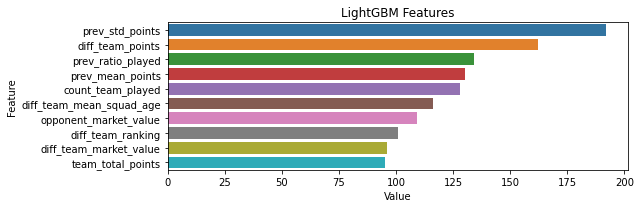

Index(['skill', 'last_md_points', 'prev_mean_points', 'prev_mean_assists',
       'prev_max_points', 'prev_std_points', 'prev_ratio_starter',
       'count_played', 'goal_consistency', 'assist_consistency',
       'clean_sheet_consistency', 'count_team_played', 'prev_ratio_played',
       'team_rank', 'team_total_points', 'opponent_rank',
       'opponent_total_points', 'team_mean_squad_age', 'team_market_value',
       'team_mean_market_value', 'opponent_mean_squad_age',
       'opponent_market_value', 'opponent_mean_market_value', 'age',
       'league_rank', 'overall', 'potential', 'wage_eur',
       'international_reputation', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'diff_team_points', 'diff_team_ranking',
       'diff_team_market_value', 'diff_team_mean_market_value',
       'diff_team_mean_squad_age', 'is_imbalanced', 'gap_to_potential',
       'position_D', 'position_F', 'position_GK', 'position_M',
       'attacking_work_rate_High', 'attacking_

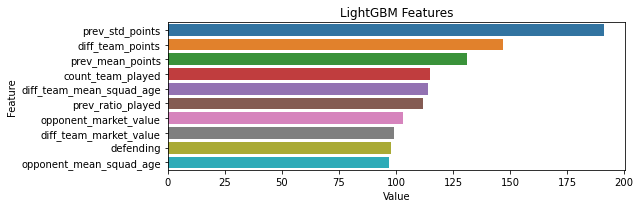

In [20]:
model_1 = get_model(train, columns,'roi')
model_2 = get_model(train, columns,'points')

In [21]:
X_test

,skill,last_md_points,prev_mean_points,prev_mean_assists,prev_max_points,prev_std_points,prev_ratio_starter,count_played,goal_consistency,assist_consistency,clean_sheet_consistency,count_team_played,prev_ratio_played,team_rank,team_total_points,opponent_rank,opponent_total_points,team_mean_squad_age,team_market_value,team_mean_market_value,opponent_mean_squad_age,opponent_market_value,opponent_mean_market_value,age,league_rank,overall,potential,wage_eur,international_reputation,pace,shooting,passing,dribbling,defending,physic,diff_team_points,diff_team_ranking,diff_team_market_value,diff_team_mean_market_value,diff_team_mean_squad_age,is_imbalanced,gap_to_potential,position_D,position_F,position_GK,position_M,attacking_work_rate_High,attacking_work_rate_Low,attacking_work_rate_Medium,defending_work_rate_High,defending_work_rate_Low,defending_work_rate_Medium
8,3.0,3.0,3.875000,0.000000,13.0,4.155461,0.750000,8.0,0.250000,0.000000,0.250000,27.0,0.296296,17,1570,13,1606,25.6,1.767500e+09,68000000.0,27.0,2.835000e+09,109000000.0,29.0,1.0,82.0,82.0,98000.0,3.0,68.0,77.0,79.0,80.0,68.0,73.0,-36,4,-1.067500e+09,-41000000.0,-1.4,False,0.0,0,0,0,1,1,0,0,1,0,0
16,3.0,1.0,2.000000,0.333333,4.0,1.732051,0.000000,3.0,0.000000,0.333333,0.000000,29.0,0.103448,29,1505,7,1642,25.0,3.250000e+09,125000000.0,27.8,7.640000e+09,293800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-137,22,-4.390000e+09,-168800000.0,-2.8,True,NaN,0,0,0,1,0,0,0,0,0,0
19,1.0,1.0,1.000000,0.000000,1.0,0.000000,0.000000,2.0,0.000000,0.000000,0.000000,27.0,0.074074,17,1570,13,1606,25.6,1.767500e+09,68000000.0,27.0,2.835000e+09,109000000.0,27.0,2.0,70.0,73.0,12000.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,-36,4,-1.067500e+09,-41000000.0,-1.4,False,3.0,0,0,1,0,0,0,1,0,0,1
20,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40,1458,44,1441,27.4,1.900000e+09,73100000.0,27.3,2.698500e+09,103800000.0,17.0,1.0,74.0,87.0,500.0,1.0,77.0,71.0,68.0,75.0,32.0,73.0,17,-4,-7.985000e+08,-30700000.0,0.1,False,13.0,0,0,0,0,1,0,0,0,0,1
26,3.0,1.0,1.200000,0.000000,2.0,0.447214,0.200000,5.0,0.000000,0.000000,0.000000,27.0,0.185185,6,1648,18,1569,26.5,9.150000e+09,381300000.0,29.2,2.150500e+09,82700000.0,24.0,1.0,79.0,85.0,80000.0,1.0,96.0,66.0,68.0,87.0,38.0,81.0,79,-12,6.999500e+09,298600000.0,-2.7,True,6.0,0,0,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7670,4.0,5.0,3.416667,0.083333,10.0,2.357535,0.958333,24.0,0.291667,0.083333,0.291667,26.0,0.923077,37,1468,5,1666,28.1,7.485000e+08,28800000.0,27.9,8.725000e+09,335600000.0,32.0,1.0,71.0,71.0,18000.0,2.0,34.0,71.0,59.0,70.0,39.0,78.0,-198,32,-7.976500e+09,-306800000.0,0.2,True,0.0,0,1,0,0,0,0,1,0,0,1
7672,2.0,2.0,2.000000,0.000000,2.0,NaN,1.000000,1.0,0.000000,0.000000,0.000000,26.0,0.038462,37,1468,5,1666,28.1,7.485000e+08,28800000.0,27.9,8.725000e+09,335600000.0,24.0,1.0,64.0,72.0,2000.0,1.0,52.0,31.0,43.0,39.0,65.0,71.0,-198,32,-7.976500e+09,-306800000.0,0.2,True,8.0,1,0,0,0,0,1,0,0,0,1
7689,4.0,2.0,3.312500,0.062500,10.0,2.701080,0.750000,16.0,0.312500,0.062500,0.312500,27.0,0.592593,6,1648,18,1569,26.5,9.150000e+09,381300000.0,29.2,2.150500e+09,82700000.0,27.0,2.0,67.0,67.0,4000.0,1.0,73.0,66.0,66.0,68.0,29.0,65.0,79,-12,6.999500e+09,298600000.0,-2.7,True,0.0,0,1,0,0,0,0,1,0,0,1
7707,2.0,0.0,3.529412,0.000000,12.0,3.144790,0.941176,17.0,0.058824,0.000000,0.411765,29.0,0.586207,29,1505,7,1642,25.0,3.250000e+09,125000000.0,27.8,7.640000e+09,293800000.0,24.0,1.0,80.0,85.0,69000.0,1.0,69.0,46.0,60.0,67.0,80.0,80.0,-137,22,-4.390000e+09,-168800000.0,-2.8,True,5.0,1,0,0,0,0,0,1,0,0,1


In [22]:
test["predicted_roi"] = model_1.predict(X_test)
test["predicted_points"] = model_2.predict(X_test)

<ipython-input-22-d6009eb4ca09>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["predicted_roi"] = model_1.predict(X_test)
<ipython-input-22-d6009eb4ca09>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["predicted_points"] = model_2.predict(X_test)


## Surfacing The Result

In [23]:
fantasy_euro = pd.read_csv("{}/interim/fantasy_euro.csv".format(DATA_DIR))

In [24]:
fantasy_euro = fantasy_euro[["player", "date", "league_name", "team_name", 
                             "opponent_name", "value", "skill", "sel_per"]]

In [25]:
players = pd.merge(test, 
                   fantasy_euro[["player", "sel_per"]],
                   how='left', on="player")

In [26]:
players = players.drop_duplicates(subset=["player", "team_name"])

In [37]:
players = players[~pd.isnull(players['position'])]
players = players[players['prev_ratio_starter'] > 0.75]
players = players[players['prev_ratio_played'] > 0.7]

In [38]:
scaler = StandardScaler()
players["scaled_points"] = scaler.fit_transform(players["predicted_points"].values.reshape(-1,1))
players["scaled_roi"] = scaler.fit_transform(players["predicted_roi"].values.reshape(-1,1))

In [39]:
players["final_score"] = players["scaled_points"] * 0.7 + players["scaled_roi"] * 0.3

In [40]:
players = players.sort_values(by=["final_score"], ascending=False)

In [41]:
col = ["player", "team_name", "opponent_name", "position", "value", "predicted_roi", "predicted_points", "final_score", "prev_max_points", "prev_mean_points", "prev_std_points", "prev_ratio_starter", "prev_ratio_played"]

In [42]:
views = players[col]

In [57]:
views.head(30)

,player,team_name,opponent_name,position,value,predicted_roi,predicted_points,final_score,prev_max_points,prev_mean_points,prev_std_points,prev_ratio_starter,prev_ratio_played
504,Robert Lewandowski,Poland,Slovakia,F,11.5,0.356363,5.763365,2.266512,14.0,5.105263,3.710267,0.947368,0.730769
213,Hakan Calhanoglu,Turkey,Italy,M,8.5,0.652335,4.471270,1.912296,10.0,4.090909,3.084664,0.909091,0.758621
306,Kasper Schmeichel,Denmark,Finland,GK,5.0,0.702827,4.163210,1.777966,7.0,4.375000,2.355613,1.000000,0.923077
216,Haris Seferovic,Switzerland,Wales,F,8.5,0.530317,4.553245,1.678230,13.0,4.000000,3.144660,0.842105,0.730769
620,Yann Sommer,Switzerland,Wales,GK,5.0,0.749154,3.880591,1.654738,14.0,4.095238,3.144913,1.000000,0.807692
69,Benjamin Pavard,France,Germany,D,6.0,0.705750,3.847579,1.519044,9.0,3.285714,2.629503,0.952381,0.750000
571,Thomas Delaney,Denmark,Finland,M,5.5,0.575399,4.206551,1.497873,9.0,2.904762,1.972429,1.000000,0.807692
27,Andreas Christensen,Denmark,Finland,D,5.5,0.641107,4.005304,1.491430,6.0,3.150000,2.400734,0.800000,0.769231
100,Cristiano Ronaldo,Portugal,Hungary,F,12.0,0.437348,4.481073,1.386348,18.0,5.736842,5.064496,0.947368,0.703704
218,Harry Maguire,England,Croatia,D,5.5,0.577772,3.940632,1.279513,12.0,4.300000,3.357631,1.000000,0.740741


In [43]:
views[views["position"] == "GK"].head(10)

,player,team_name,opponent_name,position,value,predicted_roi,predicted_points,final_score,prev_max_points,prev_mean_points,prev_std_points,prev_ratio_starter,prev_ratio_played
306,Kasper Schmeichel,Denmark,Finland,GK,5.0,0.702827,4.163210,1.777966,7.0,4.375000,2.355613,1.0,0.923077
620,Yann Sommer,Switzerland,Wales,GK,5.0,0.749154,3.880591,1.654738,14.0,4.095238,3.144913,1.0,0.807692
152,Dominik Livakovic,Croatia,England,GK,5.0,0.687142,3.380171,1.078625,7.0,3.277778,1.994273,1.0,0.720000
523,Rui Patrício,Portugal,Hungary,GK,5.5,0.639738,3.314017,0.905042,7.0,4.315789,2.473249,1.0,0.703704
612,Wayne Hennessey,Wales,Switzerland,GK,5.0,0.686205,2.942641,0.707314,7.0,4.000000,2.357023,1.0,0.703704
353,Lukás Hrádecky,Finland,Denmark,GK,4.0,0.600947,2.939332,0.492667,8.0,5.050000,2.163696,1.0,0.740741
487,Péter Gulácsi,Hungary,Portugal,GK,4.5,0.487563,2.989018,0.252825,7.0,3.526316,2.269812,1.0,0.730769
201,Gianluigi Donnarumma,Italy,Turkey,GK,5.5,0.619446,2.346238,0.038459,7.0,4.894737,2.024701,1.0,0.703704
366,Manuel Neuer,Germany,France,GK,6.0,0.391186,2.617719,-0.299789,12.0,3.947368,3.099708,1.0,0.703704
560,Stole Dimitrievski,North Macedonia,Austria,GK,4.5,0.413728,2.373658,-0.449599,7.0,3.500000,2.444625,1.0,0.814815


In [55]:
views[(views["position"] == "D") & (views["value"] == 4)].head(30)

,player,team_name,opponent_name,position,value,predicted_roi,predicted_points,final_score,prev_max_points,prev_mean_points,prev_std_points,prev_ratio_starter,prev_ratio_played
552,Stefan Ristovski,North Macedonia,Austria,D,4.0,0.327285,1.152886,-1.693918,9.0,2.739130,2.562268,0.956522,0.851852
468,Paulus Arajuuri,Finland,Denmark,D,4.0,0.214158,1.120588,-2.002261,6.0,3.666667,2.456284,0.952381,0.777778


In [53]:
views[(views["position"] == "M")].head(30)

,player,team_name,opponent_name,position,value,predicted_roi,predicted_points,final_score,prev_max_points,prev_mean_points,prev_std_points,prev_ratio_starter,prev_ratio_played
213,Hakan Calhanoglu,Turkey,Italy,M,8.5,0.652335,4.471270,1.912296,10.0,4.090909,3.084664,0.909091,0.758621
571,Thomas Delaney,Denmark,Finland,M,5.5,0.575399,4.206551,1.497873,9.0,2.904762,1.972429,1.000000,0.807692
87,Christian Eriksen,Denmark,Finland,M,9.0,0.529915,3.849577,1.083804,16.0,5.333333,4.439611,0.916667,0.923077
211,Grzegorz Krychowiak,Poland,Slovakia,M,6.0,0.491098,3.837903,0.977504,7.0,2.434783,1.408613,0.956522,0.884615
167,Eljif Elmas,North Macedonia,Austria,M,6.0,0.590389,3.257187,0.734490,12.0,3.500000,3.433033,0.863636,0.814815
174,Enis Bardhi,North Macedonia,Austria,M,6.0,0.456778,3.510005,0.615695,8.0,3.714286,2.452404,0.952381,0.777778
481,Piotr Zielinski,Poland,Slovakia,M,7.0,0.410071,3.612866,0.586379,7.0,2.818182,1.500361,0.954545,0.846154
208,Granit Xhaka,Switzerland,Wales,M,6.0,0.579794,2.932318,0.434191,7.0,2.653846,1.874936,0.961538,1.000000
257,John McGinn,Scotland,Czech Republic,M,7.5,0.401350,3.373298,0.362673,18.0,4.478261,4.521359,0.913043,0.851852
577,Thorgan Hazard,Belgium,Russia,M,8.0,0.290584,3.610512,0.287484,12.0,3.850000,2.870448,0.850000,0.740741


In [46]:
views[views["position"] == "F"].head(10)

,player,team_name,opponent_name,position,value,predicted_roi,predicted_points,final_score,prev_max_points,prev_mean_points,prev_std_points,prev_ratio_starter,prev_ratio_played
504,Robert Lewandowski,Poland,Slovakia,F,11.5,0.356363,5.763365,2.266512,14.0,5.105263,3.710267,0.947368,0.730769
216,Haris Seferovic,Switzerland,Wales,F,8.5,0.530317,4.553245,1.678230,13.0,4.000000,3.144660,0.842105,0.730769
100,Cristiano Ronaldo,Portugal,Hungary,F,12.0,0.437348,4.481073,1.386348,18.0,5.736842,5.064496,0.947368,0.703704
388,Martin Braithwaite,Denmark,Finland,F,7.5,0.378111,3.641283,0.530928,6.0,3.166667,1.761093,0.875000,0.923077
412,Memphis Depay,Netherlands,Ukraine,F,10.0,0.489006,3.215113,0.447085,16.0,5.666667,3.829708,1.000000,0.888889
567,Teemu Pukki,Finland,Denmark,F,7.0,0.525248,3.100436,0.440430,10.0,4.653846,3.097642,0.923077,0.962963
217,Harry Kane,England,Croatia,F,11.5,0.303356,3.686314,0.383149,17.0,5.478261,4.541421,0.869565,0.851852
49,Antoine Griezmann,France,Germany,F,11.0,0.369146,3.391196,0.297745,10.0,4.071429,3.078342,0.928571,1.000000
207,Goran Pandev,North Macedonia,Austria,F,6.5,0.470699,2.809158,0.059238,12.0,3.217391,2.712874,0.869565,0.851852
194,Gareth Bale,Wales,Switzerland,F,9.5,0.457352,2.636737,-0.119336,9.0,3.350000,2.455391,0.850000,0.740741
